### **_CODSOFT INTERNSHIP_**

Task 3: Iris Flower Classification Model

Author: Vaibhav Rakshe

Aim: To create a machine learning model in order to classify into different species based on specific factors.

#### **_PROJECT INTRODUCTION_**

*The Iris flower classification project aims to develop a machine learning model that can accurately classify Iris flowers into three species: setosa, versicolor, and virginica. Utilizing the widely known Iris dataset, which includes measurements of sepal and petal lengths and widths, we will train and evaluate a classification model. This project involves data exploration, preprocessing, model training, and performance evaluation to achieve reliable species prediction based on the flower's measurements. The Iris dataset is a staple in introductory machine learning tasks, making it ideal for demonstrating fundamental classification techniques.*

## **_GETTING STARTED!!_**

#### *_Importing the libraries and Loading the data_*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
iris = pd.read_csv("Iris.csv")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.shape

(150, 5)

In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
iris['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [12]:
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
Y = iris['species']

In [13]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

#### _*Splitting Dataset*_

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

#### *_Training Linear Regression Model_*

In [16]:
# Creating an instance for the LogisticRegression model
lr = LogisticRegression()

In [17]:
# Training the model with the training set
lr.fit(X_train, Y_train)

LogisticRegression()

In [18]:
# Getting predictions from the model for the given examples
predictions_train = lr.predict(X_train)
predictions_test = lr.predict(X_test)

In [19]:
# Compare with the actual values
scores_train = pd.DataFrame({'Actual': Y_train, 'Predictions': predictions_train})
scores_test = pd.DataFrame({'Actual': Y_test, 'Predictions': predictions_test})

In [20]:
# Calculating accuracy on the test set
accuracy_test = accuracy_score(Y_test, predictions_test)
print(f"Accuracy on Test Set: {accuracy_test * 100:.2f}%")

Accuracy on Test Set: 100.00%


#### *_Data Visualization_*

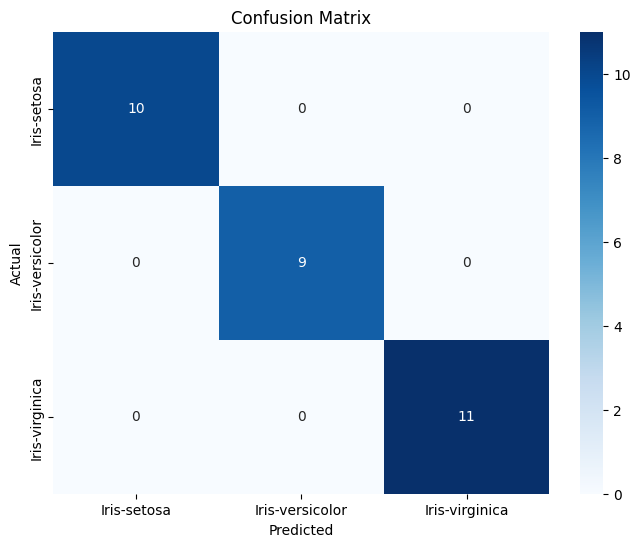

In [22]:
# Confusion Matrix
cm = confusion_matrix(Y_test, predictions_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris['species'].unique(), yticklabels=iris['species'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

*The confusion matrix shows the model's performance in classifying Iris flowers. High diagonal values indicate successful classifications (e.g., correctly identifying Iris-setosa). Off-diagonal values represent misclassifications, highlighting which species were confused the most. Based on this, we can assess the overall accuracy and identify areas for improvement, like focusing on species with higher misclassification rates.*

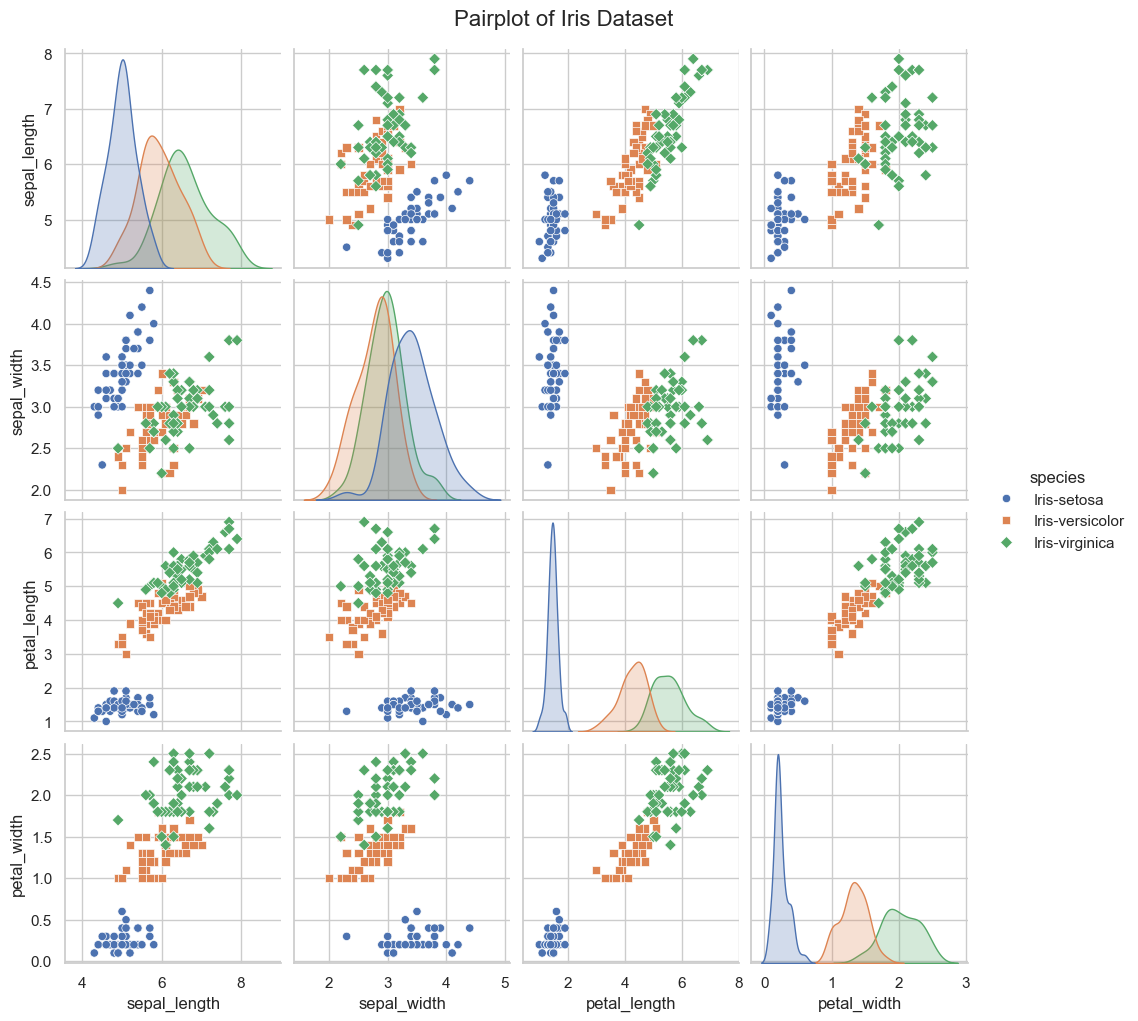

In [25]:
# Data Visualization using Seaborn Pairplot
# Set the style and create the pairplot
sns.set(style="whitegrid")
pairplot = sns.pairplot(iris, hue="species", markers=["o", "s", "D"])

# Add a title with proper positioning
pairplot.fig.suptitle("Pairplot of Iris Dataset", y=1.02, fontsize=16)
plt.show()